In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [46]:
# 1. IMPORT LIBRARIES
# ======================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report
)


In [52]:
# ======================================================
# 2. LOAD DATASET
# ======================================================
train = pd.read_csv("/kaggle/input/yashdata01/train.csv")
test  = pd.read_csv("/kaggle/input/yashdata01/test.csv")

TARGET = "Survived"


In [54]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [60]:
# ===================== BASIC CLEANING =====================
train = train.drop_duplicates()
test  = test.drop_duplicates()
# ======================================================
# 3. DATA CLEANING & PREPROCESSING
# ======================================================
# Drop duplicates
train.drop_duplicates(inplace=True)

# Drop high-cardinality / irrelevant columns
drop_cols = ["Name", "Ticket", "Cabin"]
train.drop(columns=drop_cols, inplace=True, errors="ignore")
test.drop(columns=drop_cols, inplace=True, errors="ignore")


# Separate numerical & categorical columns
num_cols = train.select_dtypes(include=["int64","float64"]).columns.drop(TARGET)
cat_cols = train.select_dtypes(include=["object"]).columns

# Handle missing values
train[num_cols] = train[num_cols].fillna(train[num_cols].median())
test[num_cols]  = test[num_cols].fillna(test[num_cols].median())

train[cat_cols] = train[cat_cols].fillna(train[cat_cols].mode().iloc[0])
test[cat_cols]  = test[cat_cols].fillna(test[cat_cols].mode().iloc[0])


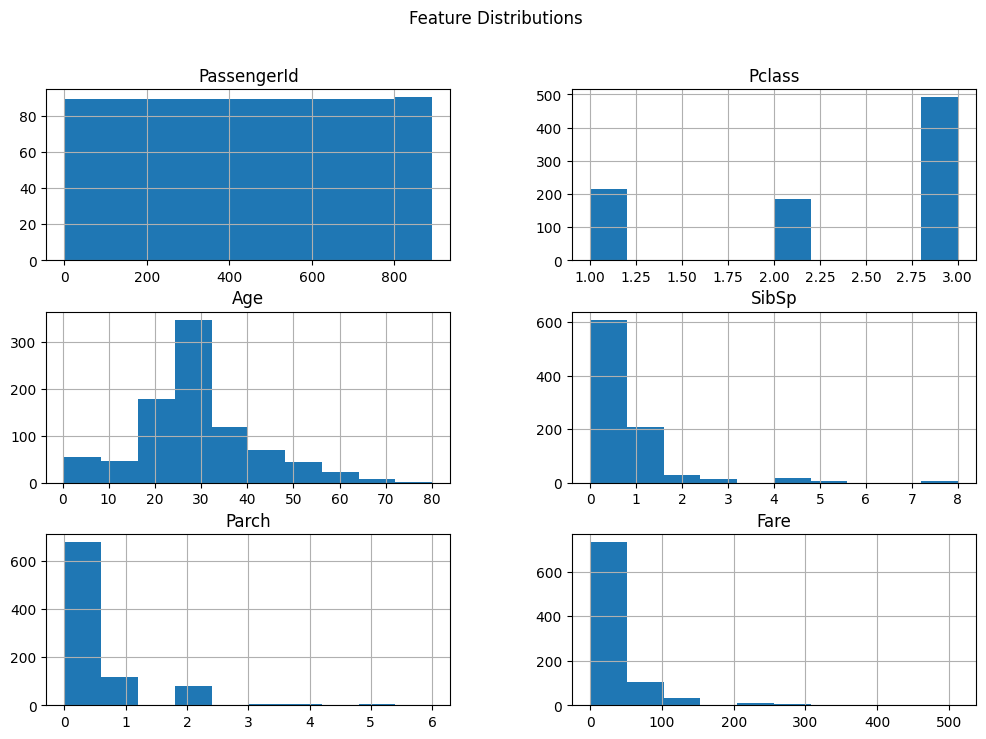

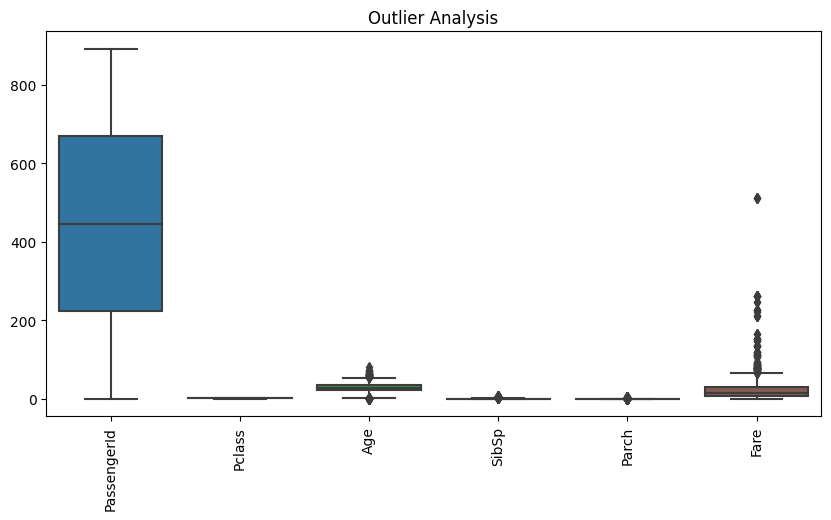

In [61]:
# ======================================================
# 4. DATA VISUALIZATION & OUTLIER ANALYSIS
# ======================================================
train[num_cols].hist(figsize=(12,8))
plt.suptitle("Feature Distributions")
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(data=train[num_cols])
plt.title("Outlier Analysis")
plt.xticks(rotation=90)
plt.show()

In [66]:
# ======================================================
# 5. ENCODING CATEGORICAL VARIABLES
# ======================================================
for col in cat_cols:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col])
    test[col]  = le.transform(test[col])


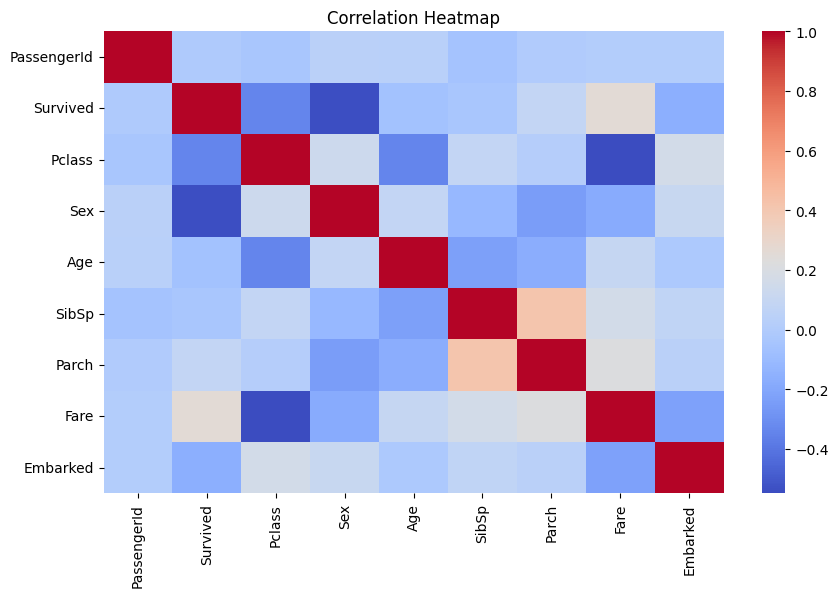

In [67]:
# ======================================================
# 6. CORRELATION ANALYSIS
# ======================================================
plt.figure(figsize=(10,6))
sns.heatmap(train.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

In [70]:
# ======================================================
# 7. FEATURE SCALING
# ======================================================
X = train.drop(TARGET, axis=1)
y = train[TARGET]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
test_scaled = scaler.transform(test)


In [73]:
# ======================================================
# 8. TRAIN–TEST SPLIT
# ======================================================
X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [76]:
# ======================================================
# 9. MODEL TRAINING
# ======================================================
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(probability=True)
}


In [77]:
# ======================================================
# 10. MODEL EVALUATION
# ======================================================
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_val)

    print(f"\n🔹 {name}")
    print("Accuracy :", accuracy_score(y_val, preds))
    print("Precision:", precision_score(y_val, preds, average="weighted"))
    print("Recall   :", recall_score(y_val, preds, average="weighted"))
    print("F1 Score :", f1_score(y_val, preds, average="weighted"))
    print("Confusion Matrix:\n", confusion_matrix(y_val, preds))
    print("Classification Report:\n", classification_report(y_val, preds))



🔹 Logistic Regression
Accuracy : 0.7932960893854749
Precision: 0.7912820994319516
Recall   : 0.7932960893854749
F1 Score : 0.79014735509156
Confusion Matrix:
 [[96 14]
 [23 46]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84       110
           1       0.77      0.67      0.71        69

    accuracy                           0.79       179
   macro avg       0.79      0.77      0.78       179
weighted avg       0.79      0.79      0.79       179


🔹 KNN
Accuracy : 0.7877094972067039
Precision: 0.7856263611400436
Recall   : 0.7877094972067039
F1 Score : 0.7840319103716299
Confusion Matrix:
 [[96 14]
 [24 45]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.87      0.83       110
           1       0.76      0.65      0.70        69

    accuracy                           0.79       179
   macro avg       0.78      0.76      0.77       179
weighted 

In [78]:
# ======================================================
# 11. HYPER-PARAMETER TUNING (RANDOM FOREST)
# ======================================================
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5]
}

grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=3,
    scoring="f1_weighted",
    n_jobs=-1
)

grid.fit(X_train, y_train)
best_rf = grid.best_estimator_

print("\nBest Random Forest Parameters:", grid.best_params_)



Best Random Forest Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}


In [79]:
# ======================================================
# 12. FINAL MODEL EVALUATION
# ======================================================
final_preds = best_rf.predict(X_val)
print("\nFinal Tuned Random Forest Performance")
print(classification_report(y_val, final_preds))



Final Tuned Random Forest Performance
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       110
           1       0.79      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



In [81]:
import pandas as pd

# Load test dataset
test = pd.read_csv("/kaggle/input/yashdata01/test.csv")

# Simple rule-based prediction (baseline)
# Predict: 1 = Survived for females, 0 = Not Survived for males
test["Survived"] = test["Sex"].apply(lambda x: 1 if x == "female" else 0)

# Create submission file
gender_submission = test[["PassengerId", "Survived"]]

# Save to CSV
gender_submission.to_csv("gender_submission.csv", index=False)

print("✅ gender_submission.csv created successfully")


✅ gender_submission.csv created successfully
